In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

print("Environment ready.")


Environment ready.


In [3]:
iris_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/iris.csv"
iris = pd.read_csv(iris_url)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


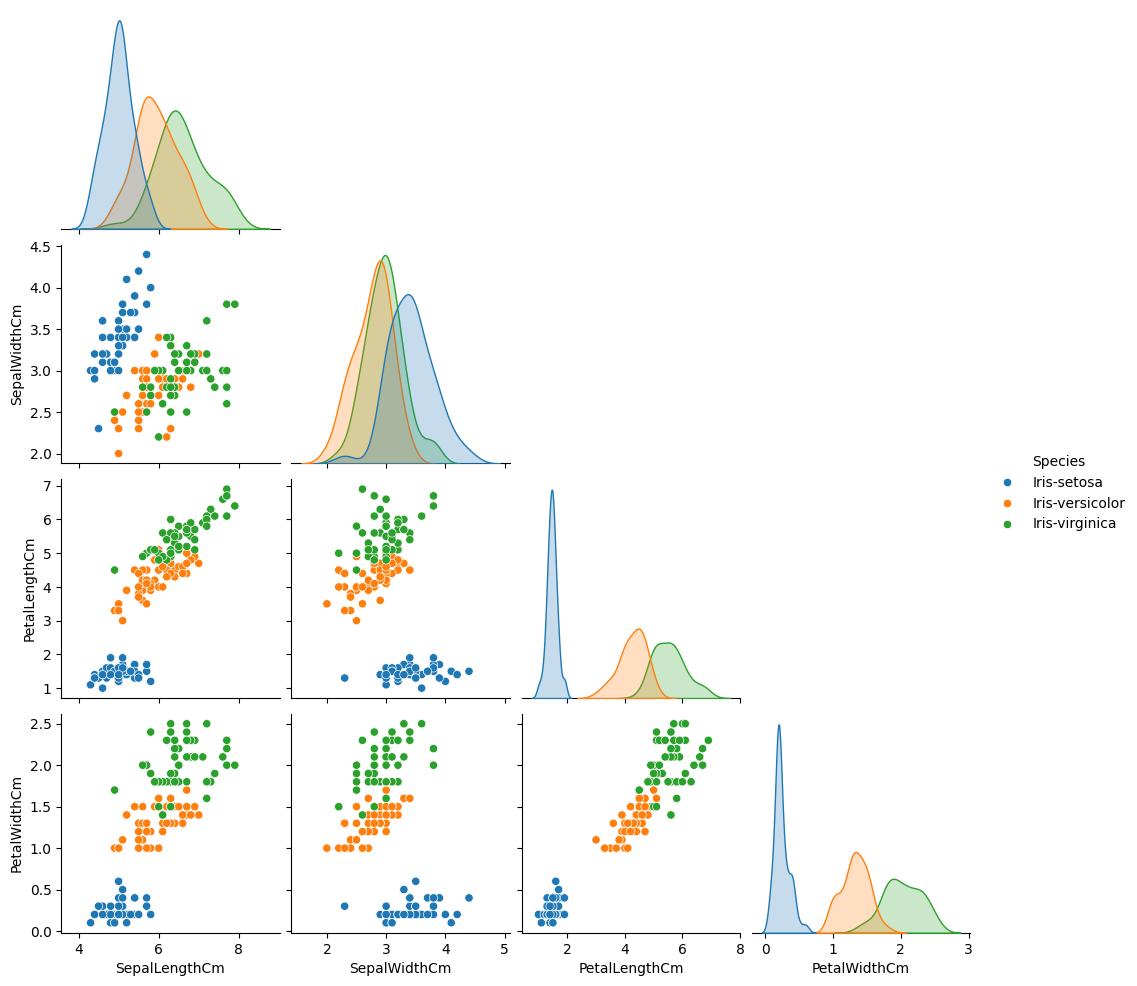

In [4]:
print(iris.shape)
print(iris.Species.value_counts())

sns.pairplot(iris, hue='Species', corner=True)
plt.show()


Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



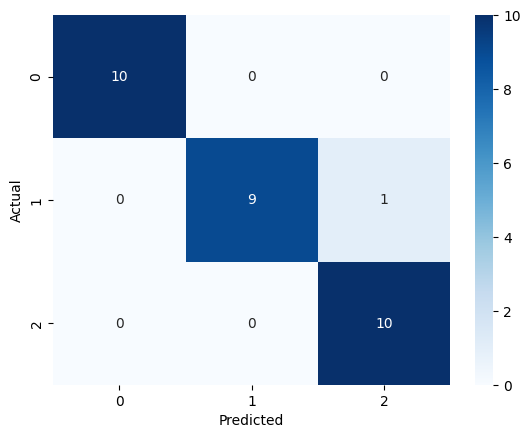

In [5]:
X = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = iris["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf_iris = LogisticRegression(max_iter=300)
clf_iris.fit(X_train, y_train)

y_pred = clf_iris.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
sample = [[5.4, 2.6, 4.1, 1.3]]
clf_iris.predict(sample)


array(['Iris-versicolor'], dtype=object)

In [7]:
cancer_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/cancer.csv"
cancer = pd.read_csv(cancer_url)
cancer.head()


,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,Malignant
1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,Malignant
2,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,Malignant
3,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.2597,Malignant
4,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,Malignant


In [8]:
target = cancer["diagnosis"]  # M = Malignant, B = Benign

features = cancer[['radius_mean', 'perimeter_mean', 'area_mean',
                   'smoothness_mean', 'compactness_mean',
                   'concavity_mean', 'symmetry_mean']]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

      Benign       0.91      0.94      0.93        72
   Malignant       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



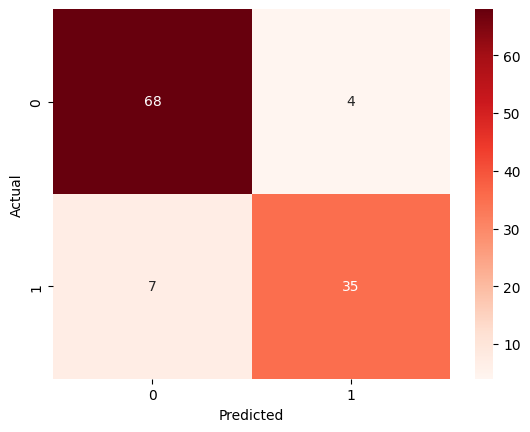

In [10]:
clf_cancer = LogisticRegression(max_iter=500)
clf_cancer.fit(X_train_scaled, y_train)

y_pred = clf_cancer.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
example = [[13.45, 86.6, 555.1, 0.1022, 0.08165, 0.03974, 0.1638]]
example_scaled = scaler.transform(example)
clf_cancer.predict(example_scaled)


array(['Benign'], dtype=object)

In [12]:
joblib.dump(clf_iris, "iris_model.joblib")
joblib.dump({'model': clf_cancer, 'scaler': scaler}, "cancer_model.joblib")

print("Saved iris_model.joblib and cancer_model.joblib")


Saved iris_model.joblib and cancer_model.joblib
